In [3]:
import numpy as np
import sacpy as scp
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
# load sst
sst = scp.load_sst()['sst']
ssta = scp.get_anom(sst)

In [6]:
# calculate Nino3.4
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))

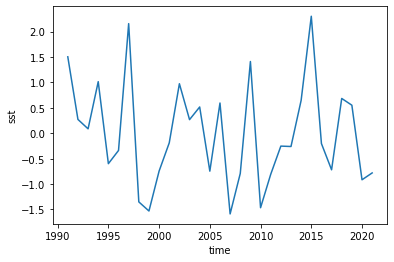

In [4]:
DJF_nino34 = scp.XrTools.spec_moth_yrmean(Nino34,[12,1,2])
DJF_nino34.plot()

In [5]:
JJA_ssta = scp.XrTools.spec_moth_yrmean(ssta, [6,7,8])
JJA_ssta.time,DJF_nino34.time

(<xarray.DataArray 'time' (time: 30)>
 array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021])
 Coordinates:
   * time     (time) int64 1992 1993 1994 1995 1996 ... 2017 2018 2019 2020 2021
     month    (time) int64 6 6 6 6 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6 6 6 6,
 <xarray.DataArray 'time' (time: 31)>
 array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019, 2020, 2021])
 Coordinates:
   * time     (time) int64 1991 1992 1993 1994 1995 ... 2017 2018 2019 2020 2021
     month    (time) int64 12 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12)

In [6]:
reg = scp.LinReg(np.array(DJF_nino34)[:-1], np.array(JJA_ssta))


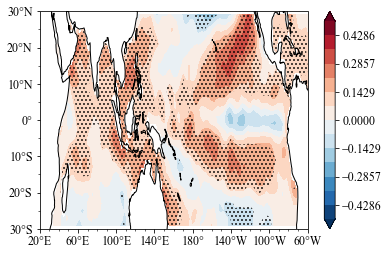

In [9]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import cartopy.crs as ccrs
plt.rc('font', family='Times New Roman', size=12)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(ssta.lon,
                ssta.lat,
                reg.slope,
                cmap="RdBu_r",
                levels=np.linspace(-0.5, 0.5, 15),
                extend="both",
                transform=ccrs.PlateCarree())
n = plt.contourf(ssta.lon,
                 ssta.lat,
                 reg.p_value,
                 levels=[0, 0.1, 1],
                 zorder=1,
                 hatches=['...', None],
                 colors="None",
                 transform=ccrs.PlateCarree())
xtk = np.arange(20,301,40)
ax.set_xticks(xtk,crs=ccrs.PlateCarree())
# ax.set_xticks(xtk,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-30,31,10),crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.coastlines()
ax.set_aspect("auto")
plt.colorbar(m)
plt.savefig("../pic/ENSO_Next_year_JJA.png",dpi=300)